In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [2]:
N = 1000
Tp = 800    

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,1.168213
1,1.727798
2,0.907261
3,0.504691
4,0.375917


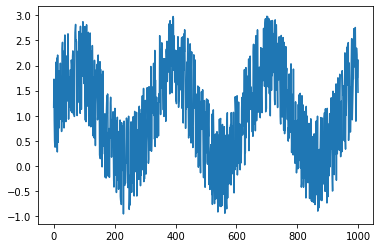

In [3]:
plt.plot(df)
plt.show()

In [4]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

Preparing data (reshaping)

RNN model requires a step value that contains n number of elements as an input sequence. 

Here, we define it as a 'step'. 

x has the following sequence data.
x = [1,2,3,4,5,6,7,8,9,10]

for step=1, x input  and its y prediction become:
x  y
1  2
2  3
3  4
4  5
..
9  10


for step=3, x and y contain:
x         y
1,2,3   4
2,3,4   5
3,4,5   6
4,5,6   7
...
7,8,9   10

As you have noticed the sizes of x input and y output become different. 

We'll fix it by adding step size into the training and test data.

In [5]:
step = 4
# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [6]:
train[-1,]

0.8096573360649577

In [7]:
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)


In [8]:
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

In [9]:
trainX[0]

array([1.1682127 , 1.72779829, 0.90726062, 0.50469125])

In [10]:
trainY[0]

0.37591718545172326

Finally, we'll reshape trainX and testX to fit with the Keras model. 

RNN model requires three-dimensional input data.
You can see the shape of testX below.

In [11]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [12]:
testX.shape

(200, 1, 4)

In [13]:
# SimpleRNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1184      
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(trainX,trainY, epochs=50, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

Epoch 1/50
50/50 - 1s - loss: 0.8673
Epoch 2/50
50/50 - 0s - loss: 0.4558
Epoch 3/50
50/50 - 0s - loss: 0.4411
Epoch 4/50
50/50 - 0s - loss: 0.4374
Epoch 5/50
50/50 - 0s - loss: 0.4329
Epoch 6/50
50/50 - 0s - loss: 0.4321
Epoch 7/50
50/50 - 0s - loss: 0.4301
Epoch 8/50
50/50 - 0s - loss: 0.4303
Epoch 9/50
50/50 - 0s - loss: 0.4282
Epoch 10/50
50/50 - 0s - loss: 0.4276
Epoch 11/50
50/50 - 0s - loss: 0.4257
Epoch 12/50
50/50 - 0s - loss: 0.4259
Epoch 13/50
50/50 - 0s - loss: 0.4227
Epoch 14/50
50/50 - 0s - loss: 0.4222
Epoch 15/50
50/50 - 0s - loss: 0.4231
Epoch 16/50
50/50 - 0s - loss: 0.4223
Epoch 17/50
50/50 - 0s - loss: 0.4202
Epoch 18/50
50/50 - 0s - loss: 0.4193
Epoch 19/50
50/50 - 0s - loss: 0.4190
Epoch 20/50
50/50 - 0s - loss: 0.4173
Epoch 21/50
50/50 - 0s - loss: 0.4169
Epoch 22/50
50/50 - 0s - loss: 0.4153
Epoch 23/50
50/50 - 0s - loss: 0.4160
Epoch 24/50
50/50 - 0s - loss: 0.4136
Epoch 25/50
50/50 - 0s - loss: 0.4136
Epoch 26/50
50/50 - 0s - loss: 0.4116
Epoch 27/50
50/50 - 0

In [15]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.3971352279186249


In [16]:
testScore = model.evaluate(testX, testY, verbose=0)
print(testScore)

0.4677281081676483


In [17]:
#index = df.index.to_numpy(copy=True)


In [18]:
#index


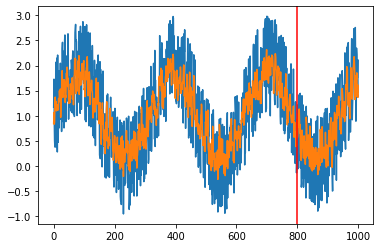

In [19]:
plt.plot(df)
plt.plot(predicted)
plt.axvline(df.index[Tp], c="r")
plt.show() 